<a href="https://colab.research.google.com/github/shailkc/NIFTY50/blob/main/final_Copy_of_Modelling_on_NSEI_Dataset_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
import chardet

In [ ]:
# NSEI Data
# data = pd.read_excel("data.xlsx")


data = pd.read_csv("datafile.csv", parse_dates=['Date'])
#read csv file and parse dates
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-04-01,5697.350098,5720.950195,5675.899902,5704.399902,5704.399902,97800.0
1,2013-04-02,5701.700195,5754.600098,5687.149902,5748.100098,5748.100098,106400.0
2,2013-04-03,5740.200195,5744.950195,5650.100098,5672.899902,5672.899902,140700.0
3,2013-04-04,5640.649902,5644.450195,5565.649902,5574.750000,5574.750000,134600.0
4,2013-04-05,5568.100098,5577.299805,5534.700195,5553.250000,5553.250000,137500.0


In [ ]:
print(data.shape)

(2469, 7)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2469 non-null   datetime64[ns]
 1   Open       2455 non-null   float64       
 2   High       2455 non-null   float64       
 3   Low        2455 non-null   float64       
 4   Close      2455 non-null   float64       
 5   Adj Close  2455 non-null   float64       
 6   Volume     2455 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 135.1 KB


In [ ]:
data.isnull().sum()

Date          0
Open         14
High         14
Low          14
Close        14
Adj Close    14
Volume       14
dtype: int64

In [ ]:
# To Check any row contains Null or Not
data[data.isna().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
186,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN
219,2014-02-17,NaN,NaN,NaN,NaN,NaN,NaN
242,2014-03-22,NaN,NaN,NaN,NaN,NaN,NaN
263,2014-04-24,NaN,NaN,NaN,NaN,NaN,NaN
380,2014-10-15,NaN,NaN,NaN,NaN,NaN,NaN
431,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN
471,2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN
500,2015-04-15,NaN,NaN,NaN,NaN,NaN,NaN
678,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN
830,2016-08-12,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#count unique dates in data df
data['Date'].nunique()


2469

In [ ]:
# Filling Null Rows with previous day data
data = data.fillna(method='ffill')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-04-01,5697.350098,5720.950195,5675.899902,5704.399902,5704.399902,97800.0
1,2013-04-02,5701.700195,5754.600098,5687.149902,5748.100098,5748.100098,106400.0
2,2013-04-03,5740.200195,5744.950195,5650.100098,5672.899902,5672.899902,140700.0
3,2013-04-04,5640.649902,5644.450195,5565.649902,5574.750000,5574.750000,134600.0
4,2013-04-05,5568.100098,5577.299805,5534.700195,5553.250000,5553.250000,137500.0


Text(0.5, 1.0, 'Close Price of NIFTY 50')

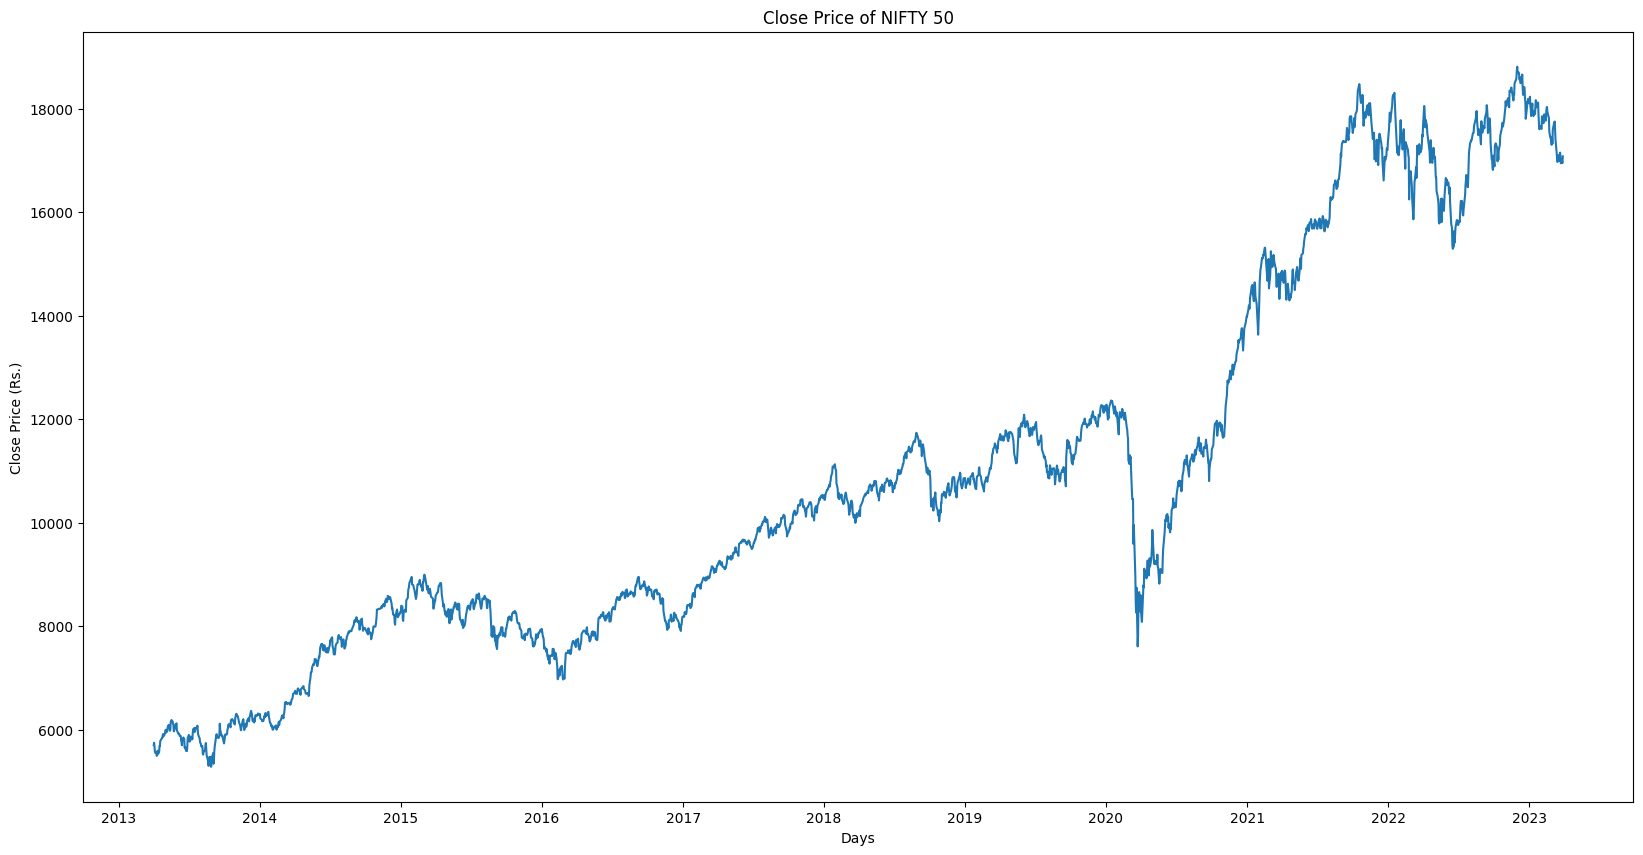

In [ ]:
plt.plot(data["Date"], data["Adj Close"])
plt.xlabel('Days')
plt.ylabel('Close Price (Rs.)')
plt.title("Close Price of NIFTY 50")

In [ ]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
#check correlation between every variable
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')



<ipython-input-116-6365a812729d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999856,0.999808,0.999654,0.999654,0.287995
High,0.999856,1.000000,0.999745,0.999838,0.999838,0.291708
Low,0.999808,0.999745,1.000000,0.999838,0.999838,0.282563
Close,0.999654,0.999838,0.999838,1.000000,1.000000,0.287294
Adj Close,0.999654,0.999838,0.999838,1.000000,1.000000,0.287294
Volume,0.287995,0.291708,0.282563,0.287294,0.287294,1.000000


In [ ]:

data.set_index('Date', inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-04-01,5697.350098,5720.950195,5675.899902,5704.399902,5704.399902,97800.0
2013-04-02,5701.700195,5754.600098,5687.149902,5748.100098,5748.100098,106400.0
2013-04-03,5740.200195,5744.950195,5650.100098,5672.899902,5672.899902,140700.0
2013-04-04,5640.649902,5644.450195,5565.649902,5574.750000,5574.750000,134600.0
2013-04-05,5568.100098,5577.299805,5534.700195,5553.250000,5553.250000,137500.0


In [ ]:
#start with
features = ['Open', 'High', 'Low', 'Volume']
target = 'Adj Close'

#normalize features
scaler = StandardScaler()
x = scaler.fit_transform(data[features])
y = data[target]


In [ ]:
x

array([[-1.42739147, -1.42974713, -1.42247029, -1.00619839],
       [-1.42619607, -1.42053764, -1.41935855, -0.96341218],
       [-1.41561634, -1.42317868, -1.4296065 , -0.79276488],
       ...,
       [ 1.6742416 ,  1.68206818,  1.68723802, -0.4061965 ],
       [ 1.68728056,  1.67406288,  1.68591012, -0.30470365],
       [ 1.67231802,  1.69168832,  1.6933367 ,  0.22813385]])

In [ ]:
# train/test split
# 70/30 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
print(x_train.shape,x_test.shape)
# data.iloc[[1727]]

(1728, 4) (741, 4)


**Applying Linear Regression Model**

In [ ]:
#get linear regressor, and train on x and y data
regressor_lr = LinearRegression()
regressor_lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = regressor_lr.predict(x_test)
y_pred

array([15688.87498085, 11164.3221014 , 11338.60869682,  9627.57670493,
       10725.75733508,  7839.33739293,  7555.73599774,  9806.49586825,
        8752.12762991,  6497.46916124, 17850.70455625, 17115.00595811,
        8287.8707699 ,  7655.58031053, 10791.2074525 , 15268.52575854,
        8405.31664896,  8883.57968592,  6784.6757933 , 11133.62640594,
        8680.9250785 ,  7551.82319484,  5949.92345349,  6518.01063749,
       17572.05034283, 14447.36381719, 14581.34772972, 10216.53083213,
       11079.59487644, 15818.30405123,  7820.11160469, 10785.11819547,
        8116.3169127 , 14795.56667772, 11430.1793625 , 12238.60874048,
        8230.63975718,  8191.64231807, 10800.99077799, 10667.42971164,
       10224.65456374,  8301.60876986, 11903.37100317,  9848.03475949,
       17835.12432134, 10677.06502533, 16187.51699155,  9301.61463323,
       16866.19181682, 11646.59683589, 11983.08442886, 17793.51998663,
        8231.32695655,  5660.19727167, 15686.04921847, 10831.49480013,
      

In [ ]:
y_pred - y_test
# max(y_pred - y_test)

Date
2021-07-01     8.874981
2019-03-11    -3.727704
2020-03-05    69.608697
2020-03-12    37.426314
2018-05-10     9.207530
                ...    
2018-07-18    12.481829
2017-06-13    26.379573
2015-06-16   -33.782260
2021-12-13    66.891730
2022-02-14    49.345935
Name: Adj Close, Length: 741, dtype: float64

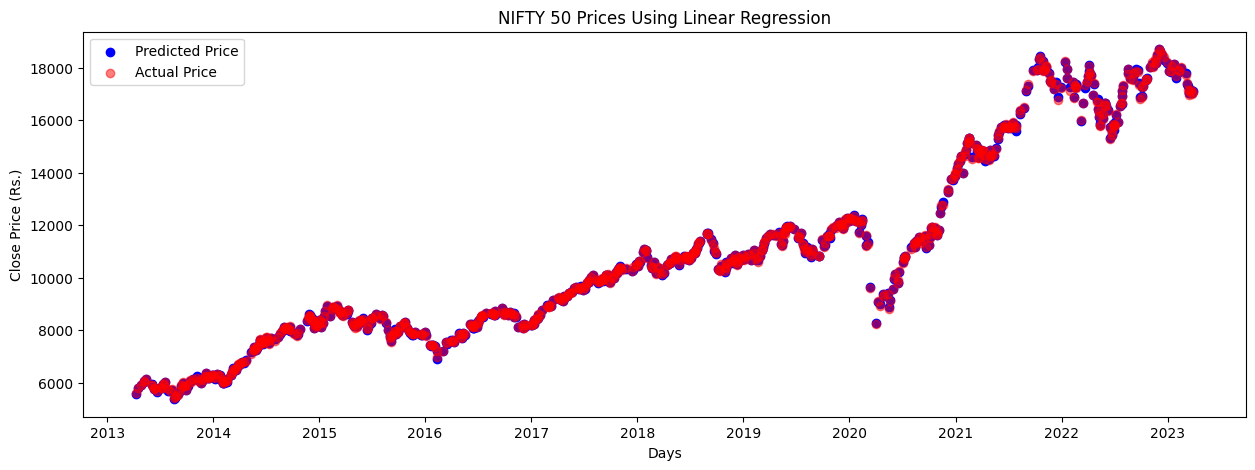

In [ ]:
#plot y_pred and y_test
plt.figure(figsize=(15,5))
plt.scatter(y_test.index, y_pred, color = 'blue', label='Predicted Price')
plt.scatter(y_test.index, y_test, color = 'red', label='Actual Price', alpha= 0.5)
plt.title('NIFTY 50 Prices Using Linear Regression')
plt.xlabel('Days')
plt.ylabel('Close Price (Rs.)')
plt.legend()
plt.show()


In [ ]:
#print regressor data
print(regressor_lr.coef_)
print(regressor_lr.intercept_)

[-2.53543495e+03  3.33923878e+03  2.83236409e+03  8.52632124e-01]
10882.896869734619


In [ ]:
#evaluate model's performance on train data
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9999105676859233
Mean Squared Error: 1138.37834256296
Root Mean Squared Error: 33.73986281185743
Mean Absolute Error: 23.796324044192144


**Random Forest Regressor**

In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor_rf = RandomForestRegressor(random_state=0)

# fit the regressor with x and y data
regressor_rf.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [ ]:
#predict value against test
y_pred_rf = regressor_rf.predict(x_test)

In [ ]:
# max(y_pred_rf - y_test)
y_pred_rf - y_test

Date
2021-07-01     42.929385
2019-03-11    -45.664043
2020-03-05     70.676113
2020-03-12    363.758213
2018-05-10     24.187637
                 ...    
2018-07-18     25.078829
2017-06-13     15.896406
2015-06-16    -34.969327
2021-12-13    171.469512
2022-02-14    141.077715
Name: Adj Close, Length: 741, dtype: float64

In [ ]:
#evaluate model's performance on test data
r2 = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
mae = mean_absolute_error(y_test, y_pred_rf)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9997656254461731
Mean Squared Error: 2983.3390635041205
Root Mean Squared Error: 54.61995114886245
Mean Absolute Error: 37.83721666500714


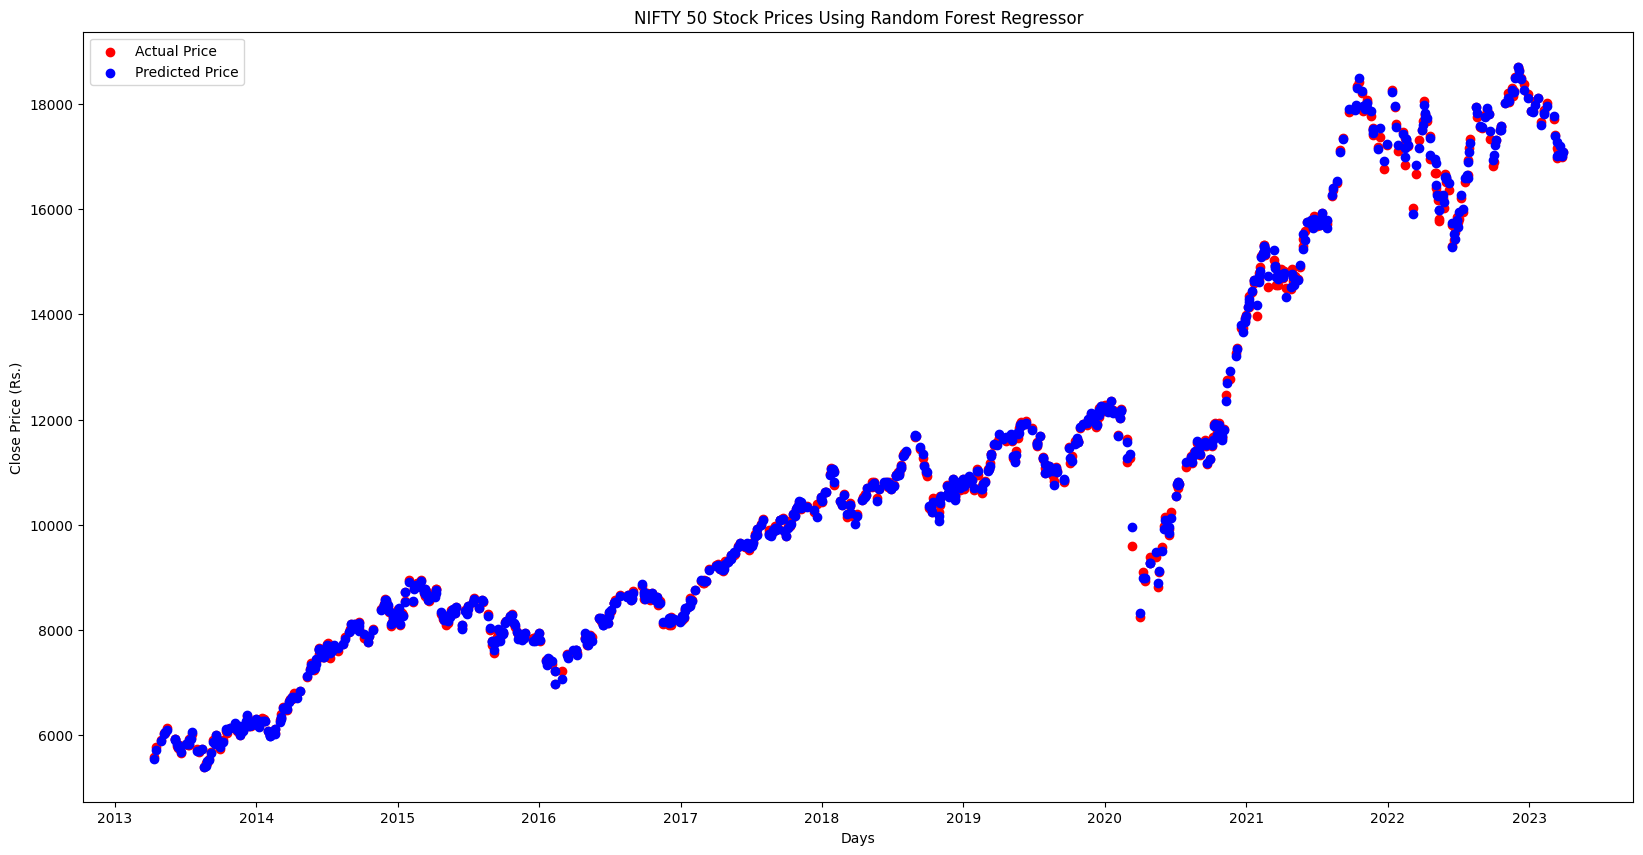

In [ ]:
#plotting
plt.rcParams["figure.figsize"] = (20,10)

plt.scatter(y_test.index, y_test, color = 'red', label="Actual Price")
plt.scatter(y_test.index,y_pred_rf, color='blue', label="Predicted Price")

plt.title('NIFTY 50 Stock Prices Using Random Forest Regressor')
plt.xlabel('Days')
plt.ylabel('Close Price (Rs.)')
plt.legend()
plt.show()

**Decision Tree Regressor**

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor_dt = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor_dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
#predict value against test
y_pred_dt = regressor_dt.predict(x_test)

In [ ]:
y_pred_dt - y_test

Date
2021-07-01     60.099609
2019-03-11    -37.649414
2020-03-05     90.900391
2020-03-12    365.049804
2018-05-10     25.000000
                 ...    
2018-07-18     36.549805
2017-06-13      6.399414
2015-06-16    -33.399903
2021-12-13    107.400391
2022-02-14    226.298828
Name: Adj Close, Length: 741, dtype: float64

In [ ]:
#evaluate model's performance on test data
r2 = r2_score(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = mean_squared_error(y_test, y_pred_dt, squared=False)
mae = mean_absolute_error(y_test, y_pred_dt)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9996006357922641
Mean Squared Error: 5083.482067698628
Root Mean Squared Error: 71.29854183430842
Mean Absolute Error: 47.34865917139005


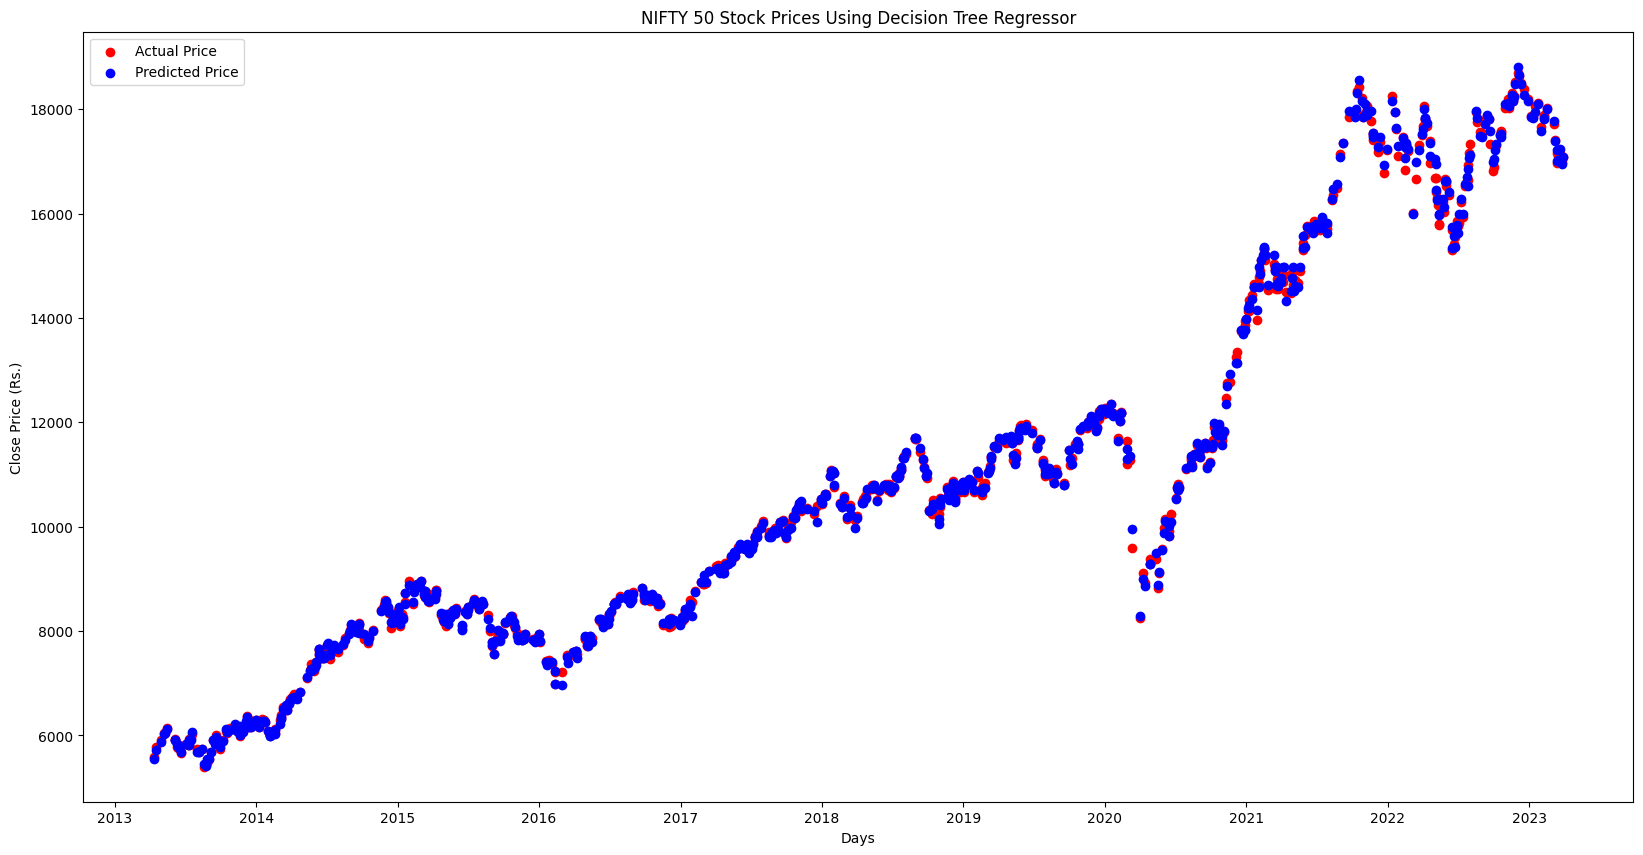

In [ ]:
#plotting
plt.rcParams["figure.figsize"] = (20,10)

plt.scatter(y_test.index, y_test, color = 'red', label="Actual Price")
plt.scatter(y_test.index,y_pred_dt, color='blue', label="Predicted Price")

plt.title('NIFTY 50 Stock Prices Using Decision Tree Regressor')
plt.xlabel('Days')
plt.ylabel('Close Price (Rs.)')
plt.legend()
plt.show()

**Support Vector Regressor**

In [ ]:
y_train

Date
2015-04-06     8659.900391
2014-09-19     8121.450195
2022-04-18    17173.650391
2019-05-20    11828.250000
2014-05-09     6858.799805
                  ...     
2019-11-28    12151.150391
2017-09-11    10006.049805
2017-11-01    10440.500000
2018-06-28    10589.099609
2016-09-28     8745.150391
Name: Adj Close, Length: 1728, dtype: float64

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

x = data[features]
y = data[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# sacling data
scaler_in = MinMaxScaler()  #  for inputs
scaler_out = MinMaxScaler()  # for outputs


x_train_sc = scaler_in.fit_transform(x_train.values)
y_train_sc = scaler_out.fit_transform(y_train.values.reshape(-1,1))

x_test_sc = scaler_in.transform(x_test.values)
y_test_sc = scaler_out.transform(y_test.values.reshape(-1,1))

regressor_svr = SVR()

# fit the regressor with X and Y data
regressor_svr.fit(x_train_sc, y_train_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred_svr_sc = regressor_svr.predict(x_test_sc)

In [ ]:
y_pred_svr = scaler_out.inverse_transform(y_pred_svr_sc.reshape(-1,1))



In [ ]:
#evaluate model's performance on test data
r2 = r2_score(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
rmse = mean_squared_error(y_test, y_pred_svr , squared=False)
mae = mean_absolute_error(y_test, y_pred_svr)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9807325670356931
Mean Squared Error: 245253.95132405873
Root Mean Squared Error: 495.2312099656672
Mean Absolute Error: 416.1574354721707


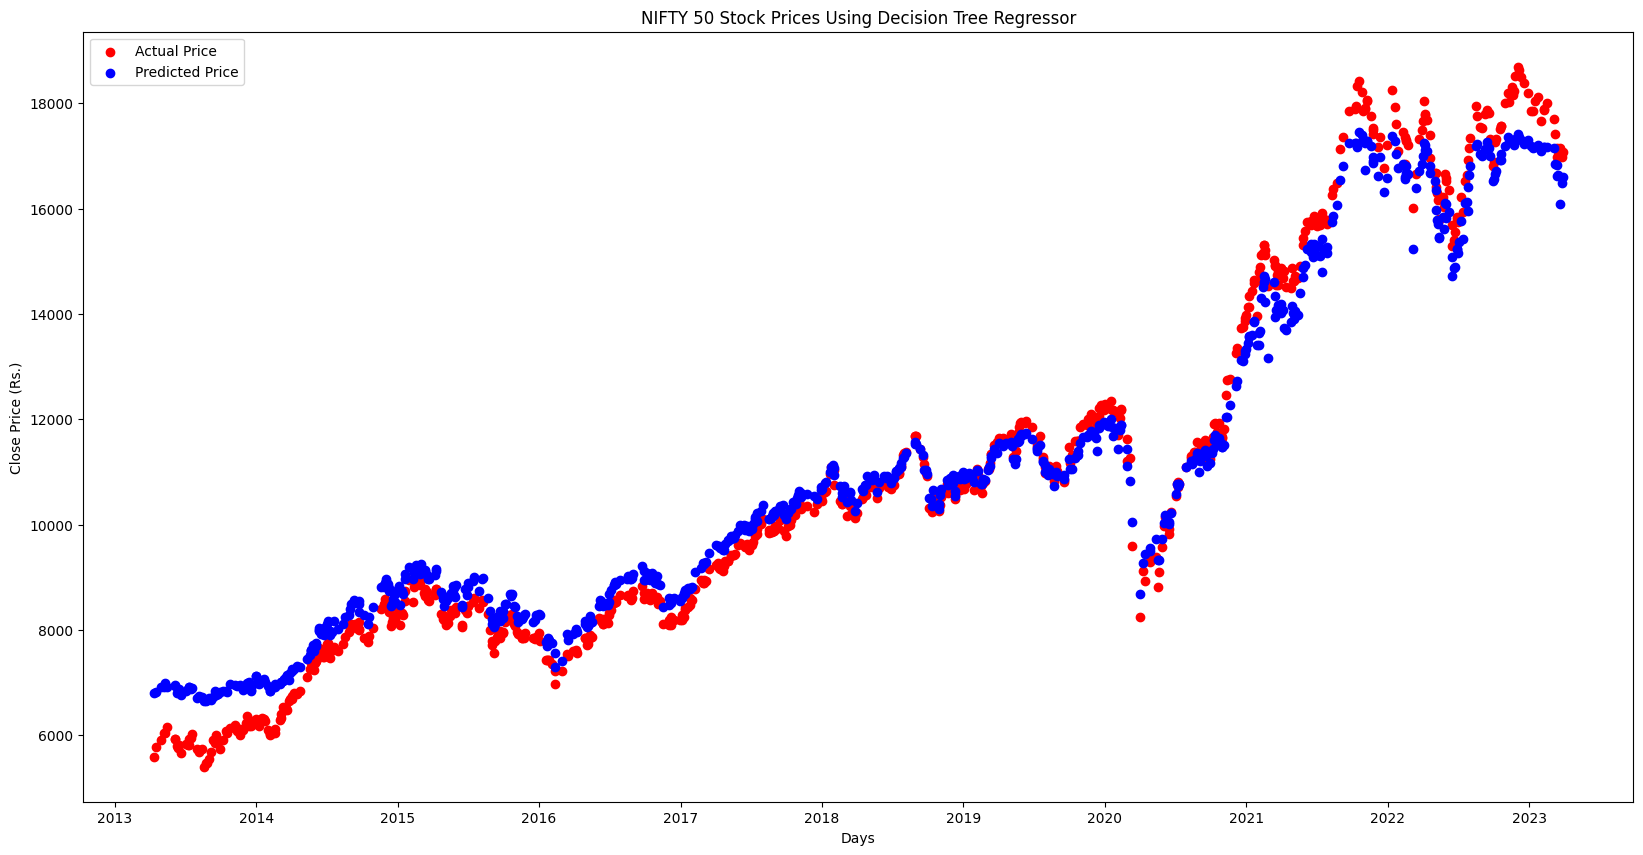

In [ ]:
#plotting
plt.rcParams["figure.figsize"] = (20,10)

plt.scatter(y_test.index, y_test, color = 'red', label="Actual Price")
plt.scatter(y_test.index,y_pred_svr, color='blue', label="Predicted Price")

plt.title('NIFTY 50 Stock Prices Using Decision Tree Regressor')
plt.xlabel('Days')
plt.ylabel('Close Price (Rs.)')
plt.legend()
plt.show()

### SVC

In [ ]:
#using SVC
y = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
data["to_buy"] = y


In [ ]:
#feature predictors
data["feature_predictor_balance"] = data.Open - data.Close
data["feature_predictor_difference"] = data.High - data.Low


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,to_buy,feature_predictor_balance,feature_predictor_difference
Date,,,,,,,,,
2013-04-01,5697.350098,5720.950195,5675.899902,5704.399902,5704.399902,97800.0,1,-7.049804,45.050293
2013-04-02,5701.700195,5754.600098,5687.149902,5748.100098,5748.100098,106400.0,0,-46.399903,67.450196
2013-04-03,5740.200195,5744.950195,5650.100098,5672.899902,5672.899902,140700.0,0,67.300293,94.850097
2013-04-04,5640.649902,5644.450195,5565.649902,5574.750000,5574.750000,134600.0,0,65.899902,78.800293
2013-04-05,5568.100098,5577.299805,5534.700195,5553.250000,5553.250000,137500.0,0,14.850098,42.599610
...,...,...,...,...,...,...,...,...,...
2023-03-23,17097.400391,17205.400391,17045.300781,17076.900391,17076.900391,219200.0,0,20.500000,160.099610
2023-03-24,17076.199219,17109.449219,16917.349609,16945.050781,16945.050781,228000.0,1,131.148438,192.099610
2023-03-27,16984.300781,17091.000000,16918.550781,16985.699219,16985.699219,218400.0,0,-1.398438,172.449219


In [ ]:
predictor_features = ["feature_predictor_balance", "feature_predictor_difference"]
predictor_target = "to_buy"
x_data = data[predictor_features]

y_data = data[predictor_target]
x_data

,feature_predictor_balance,feature_predictor_difference
Date,,
2013-04-01,-7.049804,45.050293
2013-04-02,-46.399903,67.450196
2013-04-03,67.300293,94.850097
2013-04-04,65.899902,78.800293
2013-04-05,14.850098,42.599610
...,...,...
2023-03-23,20.500000,160.099610
2023-03-24,131.148438,192.099610
2023-03-27,-1.398438,172.449219


In [ ]:




x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)



model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC()

In [ ]:
y_pred_svc =  model_svc.predict(x_test)

In [ ]:
y_pred_svc - y_test
max(y_pred_svc - y_test)

1

Accuracy of SVC model is:  55.465587044534416 %


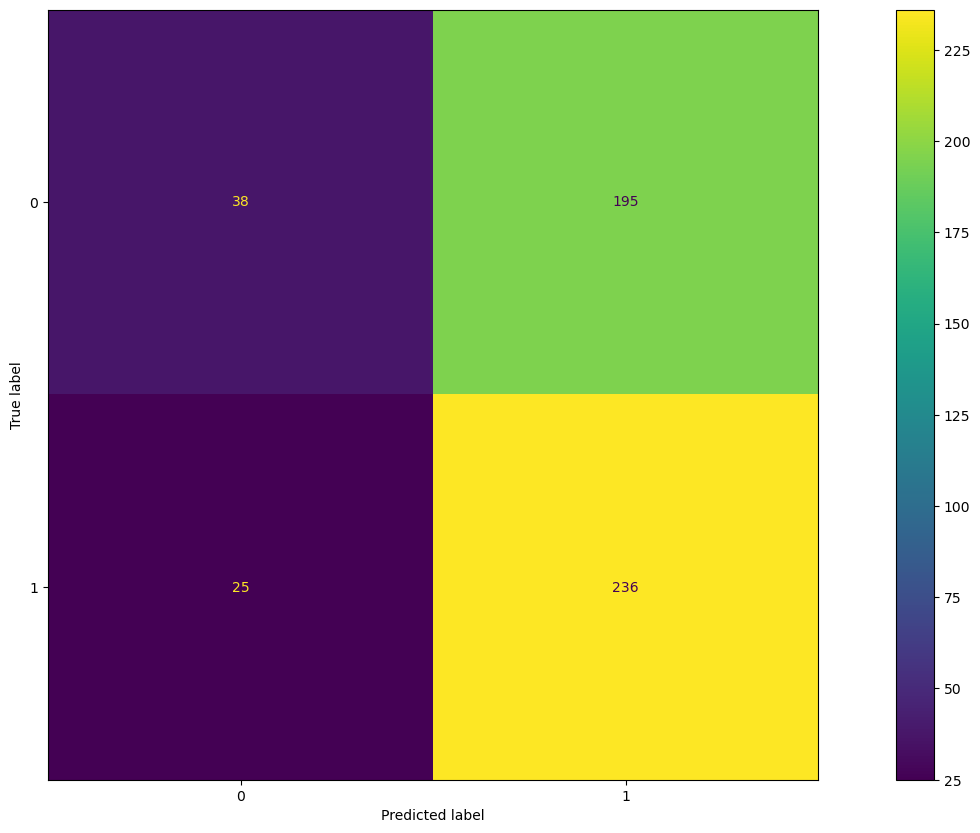

In [ ]:
from sklearn.metrics import pair_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#accuracy score
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy of SVC model is: ", accuracy*100, "%")
#plot confusion matrix
cm = confusion_matrix(y_test, y_pred_svc, labels=model_svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_svc.classes_)
disp.plot()
plt.show()
